/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.1415 - loss: 1.7145 - val_accuracy: 0.2812 - val_loss: 1.7773
Epoch 2/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.2010 - loss: 1.7598 - val_accuracy: 0.3250 - val_loss: 1.7725
Epoch 3/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2395 - loss: 1.8925 - val_accuracy: 0.3031 - val_loss: 1.7691
Epoch 4/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.2264 - loss: 1.6598 - val_accuracy: 0.3438 - val_loss: 1.7722
Epoch 5/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2318 - loss: 1.8816 - val_accuracy: 0.3313 - val_loss: 1.7715
Epoch 6/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.2547 - loss: 1.8514 - val_accuracy: 0.3562 - val_loss: 1.7660
Epoch 7/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2442 - loss: 1.7530 - val_accuracy: 0.3469 - val_loss: 1.7664
Epoch 8/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2358 - loss: 1.6665 - val_accuracy: 0.3

Test Accuracy: 0.3531
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.09      0.60      0.15        10
           2       0.67      0.48      0.56       130
           3       0.55      0.20      0.29       132
           4       0.31      0.36      0.33        42
           5       0.08      0.80      0.15         5

    accuracy                           0.35       320
   macro avg       0.28      0.41      0.25       320
weighted avg       0.55      0.35      0.40       320



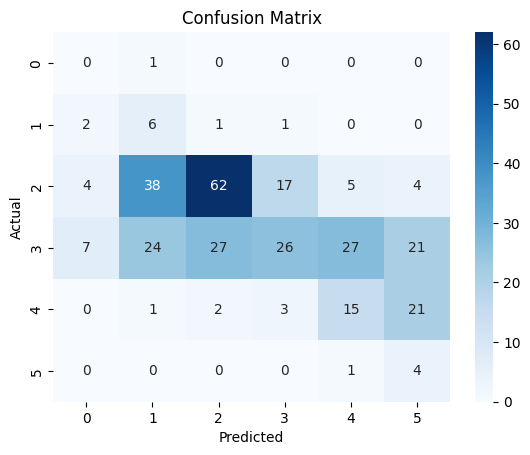

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset
url = 'https://drive.google.com/uc?id=1uutPAkOSYb2Uror1mk2dZUtoYbCgz6DO'
data = pd.read_csv(url)

# Data Preprocessing
X = data.drop(columns=['quality'])  # Features
y = data['quality']  # Target

# Encode labels if necessary
y = LabelEncoder().fit_transform(y)

# Compute Class Weights to handle imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build ANN Model
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(len(np.unique(y)), activation='softmax')  # Output layer (multi-class)
])

# Compile Model with Adam Optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model with Class Weights
history = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_data=(X_test, y_test), class_weight=class_weight_dict)

# Evaluate Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Save Model
model.save('wine_quality_model.h5')

# Load and Deploy Model
loaded_model = keras.models.load_model('wine_quality_model.h5')
predictions = np.argmax(loaded_model.predict(X_test), axis=1)

# Compute Performance Metrics
print("Classification Report:")
print(classification_report(y_test, predictions))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
